In [11]:
import pandas as pd
import re
import torch

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
after=torch.load("../code/MasksPruned/Cluster3masks.pt")

In [34]:
bfore=torch.load("../code/MasksPruned/Cluster4masks.pt")

In [35]:
((after == bfore) == False).sum() 

tensor(643698)

What compositions are preserved or lost when pruning Cluster1

In [285]:
#concs_1p: concept groups in pruned
#concs_1np: concept groups in unpruned
#lc[0]: concept groups in pruned but not in not pruned
#lc[1]: concept groups in not pruned but not in pruned

per_unit_compositions_1p = get_grouped_concepts_per_unit(clus_1_p)
concs_1p = all_grouped_cps(per_unit_compositions_1p)
per_unit_compositions_1np=get_grouped_concepts_per_unit(clus_1_np)
concs_1np = all_grouped_cps(per_unit_compositions_1np)


lc=lost_concepts(concs_1p, concs_1np)

print(len(concs_1p), len(concs_1np), len(lc[0]), len(lc[1]))
print(preserved_concepts(concs_1p,concs_1np))  #when u prune out no compositional are preserved, only singular concepts

1286 1259 1243 1216
{'(NOT pre:tok:are)', '(NOT pre:tok:white)', '(NOT hyp:tok:to)', '(NOT pre:tok:two)', '(NOT hyp:tok:on)', '(NOT hyp:tok:man)', '(NOT pre:tok:girl)', '(NOT oth:overlap:overlap25)', '(NOT pre:tok:one)', '(NOT pre:tok:her)', '(NOT hyp:tok:with)', '(NOT pre:tok:people)', '(NOT pre:tok:is)', '(NOT pre:tok:on)', '(NOT hyp:tok:two)', '(NOT pre:tok:sitting)', '(NOT pre:tok:in)', '(NOT pre:tok:woman)', '(NOT pre:tok:dog)', '(NOT hyp:tok:are)', '(NOT hyp:tok:at)', '(NOT pre:tok:blue)', '(NOT hyp:tok:is)', '(NOT hyp:tok:group)', '(NOT hyp:tok:people)', '(NOT pre:tok:and)', '(NOT pre:tok:at)', '(NOT hyp:tok:sitting)', '(NOT oth:overlap:overlap50)', '(NOT pre:tok:to)', '(NOT pre:tok:boy)', '(NOT pre:tok:with)', '(NOT pre:tok:standing)', '(NOT pre:tok:man)', '(NOT pre:tok:front)', '(NOT hyp:tok:playing)', '(NOT hyp:tok:in)', '(NOT pre:tok:wearing)', '(NOT oth:overlap:overlap75)', '(NOT pre:tok:while)', '(NOT hyp:tok:woman)', '(NOT pre:tok:black)', '(NOT pre:tok:young)'}


What individual concepts are preserved or lost when pruning Cluster1

In [288]:
clus_1_pruned_concepts = get_indiv_concepts(clus_1_p,False)

print("Num concepts in pruned: " , len(clus_1_pruned_concepts))
clus_1_notpruned_concepts=get_indiv_concepts(clus_1_np,False)
print("Num concepts in not pruned: ", len(clus_1_notpruned_concepts))


lc=lost_concepts(clus_1_pruned_concepts, clus_1_notpruned_concepts)
print("Num concepts in pruned but not in not pruned: ", len(lc[0]), "\nNum concepts in not pruned but not in pruned: ", len(lc[1]))
preserved_concepts(clus_1_c,clus_1_nc) #some concepts are preserved but their compositions change. so dog and cat in not pruned, dog and cat remain present after pruning, but maybe its dog and not cay or dog or cat 
indiv_concepts_lost_after_pruning_c1=lc[1]#see if you retrain, do you regain the explanations/concepts you lost
print(concepts_lost_after_pruning)

Num concepts in pruned:  759
Num concepts in not pruned:  1009
Num concepts in pruned but not in not pruned:  490 
Num concepts in not pruned but not in pruned:  740
{'hyp:tok:handing', 'pre:tok:students', 'hyp:tok:juggling', 'hyp:tok:exercising', 'hyp:tok:bamboo', 'hyp:tok:walked', 'hyp:tok:dock', 'hyp:tok:points', 'hyp:tok:polo', 'pre:tok:scenery', 'hyp:tok:food', 'hyp:tok:tennis', 'hyp:tok:him', 'hyp:tok:very', 'hyp:tok:surfer', 'hyp:tok:it', 'pre:tok:telling', 'pre:tok:sign', 'hyp:tok:ladies', 'hyp:tok:drives', 'pre:tok:restaurant', 'pre:tok:sleep', 'pre:tok:trees', 'hyp:tok:costumed', 'hyp:tok:elder', 'pre:tok:air', 'hyp:tok:grassy', 'hyp:tok:cut', 'hyp:tok:bikers', 'hyp:tok:buddhist', 'pre:tok:toddler', 'pre:tok:boy', 'pre:tok:playground', 'hyp:tok:vendor', 'hyp:tok:cloth', 'hyp:tok:weather', 'hyp:tok:goggles', 'hyp:tok:addressing', 'pre:tok:traveling', 'pre:tok:indian', 'hyp:tok:fishing', 'pre:tok:wash', 'hyp:tok:magazine', 'pre:tok:exercising', 'pre:tok:stack', 'pre:tok:best', 

What compositions are preserved or lost when pruning Cluster2

In [ ]:
#concs_1p: concept groups in pruned
#concs_1np: concept groups in unpruned
#lc[0]: concept groups in pruned but not in not pruned
#lc[1]: concept groups in not pruned but not in pruned

per_unit_compositions_clus2p = get_grouped_concepts_per_unit(clus_2_p)
concs_2p = all_grouped_cps(per_unit_compositions_clus2p)
per_unit_compositions_clus2np =get_grouped_concepts_per_unit(clus_2_np)
concs_2np = all_grouped_cps(per_unit_compositions_clus2np)


lc=lost_concepts(concs_2p, concs_2np)

print(len(concs_2p), len(concs_2np), len(lc[0]), len(lc[1]))
preserved_concepts(concs_2p,concs_2np) #when u prune out no compositional are preserved, only singular concepts

What individual concepts are preserved or lost when pruning Cluster2

In [284]:
clus_2_pruned_concepts = get_indiv_concepts(clus_2_p,False)
print("Num concepts in pruned: " , len(clus_2_pruned_concepts))
clus_2_notpruned_concepts=get_indiv_concepts(clus_2_np,False)
print("Num concepts in not pruned: ", len(clus_2_notpruned_concepts))


lc= lost_concepts(clus_2_pruned_concepts, clus_2_notpruned_concepts)
print("Num concepts in pruned but not in not pruned: ", len(lc[0]), "\nNum concepts in not pruned but not in pruned: ", len(lc[1]))
preserved = preserved_concepts(clus_2_pruned_concepts,clus_2_notpruned_concepts) #some concepts are preserved but their compositions change. so dog and cat in not pruned, dog and cat remain present after pruning, but maybe its dog and not cay or dog or cat 
indiv_concepts_lost_after_pruning_c2=lc[1]#see if you retrain, do you regain the explanations/concepts you lost
print(indiv_concepts_lost_after_pruning_c2)

Num concepts in pruned:  583
Num concepts in not pruned:  689
Num concepts in pruned but not in not pruned:  276 
Num concepts in not pruned but not in pruned:  382
{'pre:tok:kayak', 'hyp:tok:bamboo', 'pre:tok:fishing', 'hyp:tok:skydiving', 'hyp:tok:polo', 'pre:tok:blows', 'pre:tok:year', 'hyp:tok:beam', 'hyp:tok:telescope', 'hyp:tok:goods', 'pre:tok:one', 'pre:tok:knee', 'pre:tok:paved', 'pre:tok:catcher', 'pre:tok:competitive', 'pre:tok:preschool', 'pre:tok:leaps', 'hyp:tok:t', 'pre:tok:auditorium', 'pre:tok:life', 'pre:tok:bananas', 'pre:tok:yellow', 'hyp:tok:file', 'pre:tok:6', 'pre:tok:crime', 'pre:tok:hoops', 'hyp:tok:acoustic', 'pre:tok:t', 'hyp:tok:instrument', 'hyp:tok:power', 'hyp:tok:tie', 'pre:tok:diaper', 'hyp:tok:napping', 'hyp:tok:clear', 'hyp:tok:derby', 'hyp:tok:gloves', 'hyp:tok:crossed', 'hyp:tok:fruit', 'hyp:tok:pizza', 'pre:tok:female', 'hyp:tok:crime', 'pre:tok:walked', 'hyp:tok:furniture', 'pre:tok:showing', 'hyp:tok:wrapped', 'hyp:tok:rope', 'pre:tok:scale', 'pr

What compositions are preserved or lost when pruning Cluster3

In [265]:
#concs_1p: concept groups in pruned
#concs_1np: concept groups in unpruned
#lc[0]: concept groups in pruned but not in not pruned
#lc[1]: concept groups in not pruned but not in pruned

per_unit_compositions_clus3p = get_grouped_concepts_per_unit(clus_3_p)
concs_3p = all_grouped_cps(per_unit_compositions_clus3p)
per_unit_compositions_clus3np =get_grouped_concepts_per_unit(clus_3_np)
concs_3np = all_grouped_cps(per_unit_compositions_clus3np)


lc=lost_concepts(concs_3p, concs_3np)

print(len(concs_3p), len(concs_3np), len(lc[0]), len(lc[1]))
concepts_lost_after_pruning_c3 = lc[1]
print(preserved_concepts(concs_3p,concs_3np)) #when u prune out no compositional are preserved, only singular concepts

819 835 704 720
{'((NOT pre:tok:to) AND (hyp:tok:women AND pre:tok:men))', '((hyp:tok:eating OR hyp:tok:sitting) OR hyp:tok:sits)', '(NOT oth:overlap:overlap25)', '(hyp:tok:women AND pre:tok:men)', '(hyp:tok:bank AND pre:tok:in)', '(NOT pre:tok:red)', '(hyp:tok:street AND pre:tok:flowered)', '(hyp:tok:human AND pre:tok:toys)', '(((NOT pre:tok:to) AND (hyp:tok:women AND pre:tok:men)) OR hyp:tok:vegetable)', '(hyp:tok:standing AND pre:tok:sitting)', '(NOT pre:tok:women)', '(hyp:tok:at OR hyp:tok:in)', '((NOT hyp:tok:man) AND (hyp:tok:woman AND pre:tok:man))', '(NOT hyp:tok:outside)', '(NOT hyp:tok:people)', '(hyp:tok:outside AND pre:tok:washes)', '(NOT pre:tok:shirt)', '((NOT oth:overlap:overlap25) AND pre:tok:in)', '(hyp:tok:old AND pre:tok:tools)', '(hyp:tok:tall AND pre:tok:men)', '(NOT pre:tok:man)', '(hyp:tok:woman AND pre:tok:man)', '(hyp:tok:playing OR hyp:tok:running)', '(NOT oth:overlap:overlap75)', '(NOT pre:tok:men)', '(hyp:tok:in OR hyp:tok:on)', '(NOT pre:tok:sits)', '((NOT 

What individual concepts are preserved or lost when pruning Cluster2

In [290]:
clus_3_pruned_concepts = get_indiv_concepts(clus_3_p,False)
print("Num concepts in pruned: " , len(clus_3_pruned_concepts))
clus_3_notpruned_concepts=get_indiv_concepts(clus_3_np,False)
print("Num concepts in not pruned: ", len(clus_3_notpruned_concepts))


lc=lost_concepts(clus_3_pruned_concepts, clus_3_notpruned_concepts)
print("Num concepts in pruned but not in not pruned: ", len(lc[0]), "\nNum concepts in not pruned but not in pruned: ", len(lc[1]))
preserved = preserved_concepts(clus_3_pruned_concepts,clus_3_notpruned_concepts) #some concepts are preserved but their compositions change. so dog and cat in not pruned, dog and cat remain present after pruning, but maybe its dog and not cay or dog or cat 
indiv_concepts_lost_after_pruning_c3=lc[1]#see if you retrain, do you regain the explanations/concepts you lost
print(indiv_concepts_lost_after_pruning_c3)

Num concepts in pruned:  465
Num concepts in not pruned:  492
Num concepts in pruned but not in not pruned:  236 
Num concepts in not pruned but not in pruned:  263
{'hyp:tok:handing', 'pre:tok:students', 'hyp:tok:juggling', 'hyp:tok:exercising', 'hyp:tok:bamboo', 'hyp:tok:walked', 'hyp:tok:dock', 'hyp:tok:points', 'hyp:tok:polo', 'pre:tok:scenery', 'hyp:tok:food', 'hyp:tok:tennis', 'hyp:tok:him', 'hyp:tok:very', 'hyp:tok:surfer', 'hyp:tok:it', 'pre:tok:telling', 'pre:tok:sign', 'hyp:tok:ladies', 'hyp:tok:drives', 'pre:tok:restaurant', 'pre:tok:sleep', 'pre:tok:trees', 'hyp:tok:costumed', 'hyp:tok:elder', 'pre:tok:air', 'hyp:tok:grassy', 'hyp:tok:cut', 'hyp:tok:bikers', 'hyp:tok:buddhist', 'pre:tok:toddler', 'pre:tok:boy', 'pre:tok:playground', 'hyp:tok:vendor', 'hyp:tok:cloth', 'hyp:tok:weather', 'hyp:tok:goggles', 'hyp:tok:addressing', 'pre:tok:traveling', 'pre:tok:indian', 'hyp:tok:fishing', 'pre:tok:wash', 'hyp:tok:magazine', 'pre:tok:exercising', 'pre:tok:stack', 'pre:tok:best', '

In [307]:
lost_concepts = [indiv_concepts_lost_after_pruning_c1, indiv_concepts_lost_after_pruning_c2, indiv_concepts_lost_after_pruning_c3]
max_len = 740
for i,losses in enumerate(lost_concepts):
    losses = list(losses)
    while len(losses) < max_len:
        losses.append(' ') 
    lost_concepts[i] = sorted(losses)
    for j in sorted(losses):
        if j == ' ':
            lost_concepts[i].append(lost_concepts[i].pop(0))
pd.DataFrame({"Pruning C1":lost_concepts[0], "Pruning C2":lost_concepts[1], "Pruning C3":lost_concepts[2]}).to_csv("LostConceptsAfterPruningNoRetrain.csv")

How do concepts get arranged after pruning w/o retraining

In [267]:
clus3_rearrangment=common_concepts_explained_neurons(per_unit_compositions_clus3np, per_unit_compositions_clus3p, preserved_concepts(concs_3p,concs_3np))

In [268]:
clus2_rearrangment=common_concepts_explained_neurons(per_unit_compositions_clus2np, per_unit_compositions_clus2p, preserved_concepts(concs_2p,concs_2np))

In [269]:
clus1_rearrangment = common_concepts_explained_neurons(per_unit_compositions_1p, per_unit_compositions_1np, preserved_concepts(concs_1p,concs_1np))

**Loading file into df**

In [4]:
import numpy as np
def store_best_exp(df):
    best_exp=pd.DataFrame({})
    for neuron in df['unit'].unique():
        index_of_best_exp = np.argmax(df[df['unit']==neuron]['best_iou'].tolist())
        formula = df[df['unit']==neuron].iloc[index_of_best_exp]['best_name']
        iou = df[df['unit']==neuron].iloc[index_of_best_exp]['best_iou']
        best_exp=pd.concat([best_exp, pd.DataFrame({'unit': [neuron], 'best_name':[formula], "best_iou":[iou]  })])
    return best_exp.reset_index().drop(columns=['index'])

In [6]:
def prep(file, edit):
    df = pd.read_csv(file)
    if edit:
        #df = df.rename(columns={'inds of samples containing concept': 'best_iou', 'formula': 'best_name'})
        df = store_best_exp(df)
        df=df.drop_duplicates()
    df=df.drop((df[df.best_iou==0]).index)
    df=df.drop_duplicates()
    return df

def get_percent_dif(run1, run2, run3):
    pairs = [(run1, run2), (run1, run3), (run2, run3)]
    index2key={0:"Dif Between Run 0 and 1", 1:"Dif Between Run 1 and 2", 2:"Dif Between Run 2 and 3" }
    dif_percent = {"Dif Between Run 0 and 1":0 , "Dif Between Run 1 and 2":0, "Dif Between Run 2 and 3":0}
    for i,pair in enumerate(pairs):
        int_runArunB_df = pd.merge(pair[0], pair[1])
        union_runArunB_df = pd.concat([pair[0], pair[1]])
        int_runArunB_df=int_runArunB_df.drop_duplicates()
        union_runArunB_df=union_runArunB_df.drop_duplicates()
        sim=len(int_runArunB_df)/len(union_runArunB_df)
        dif_percent[index2key[i]] = (1-sim)
    return dif_percent

clus_1_p = prep("../Cluster1IOUS5%.csv",True)
'''clus_2_p = prep("../Cluster2IOUSPrunedWoRetrain.csv",True)
clus_3_p = prep("../Cluster3IOUSPrunedWoRetrain.csv",True)
clus_4_p = prep("../Cluster4IOUSPrunedWoRetrain.csv",True)


clus_1_np = prep("../Cluster1IOUSNoPrune.csv", True)
clus_2_np = prep("../Cluster2IOUSNoPrune.csv", True)
clus_3_np = prep("../Cluster3IOUSNoPrune.csv", True)
clus_4_np = prep("../Cluster4IOUSNoPrune.csv", True)'''

def neuron_count(df):
    return len(df['unit'].unique())
#clu1=prep("../Cluster1IOUS1024N.csv",True)

Comparing Concepts Across dfs

In [9]:
get_avg_iou(clus_1_p.best_iou)

0.08348615316111749

In [258]:
def get_indiv_concepts(df, with_neurons=False):
    if not with_neurons:
        concepts= set()
        expls = [form for form in df.best_name]
        expls = " ".join(expls)
        concps = re.findall(r'\b(?:pre:tok:|hyp:tok:|oth:)\S*', expls)
        for i,_ in enumerate(concps):
            while concps[i][-1] == ')':
                concps[i] = concps[i][:-1]
            concepts.add(concps[i])
                
    else:
        concepts = {}
        for unit,expl in zip(df.unit, df.best_name):
            concps = re.findall(r'\b(?:pre:tok:|hyp:tok:|oth:)\S*', expl)
            for i in range(len(concps)):
                while concps[i][-1] == ')':
                    concps[i] = concps[i][:-1]
            concepts[unit] = concps
    return concepts

In [127]:
def get_indiv_concepts(df, with_neurons=False):
    if not with_neurons:
        concepts= set()
        expls = [form for form in df.best_name]
        expls = " ".join(expls)
        concps = re.findall(r'\b(?:pre:tok:|hyp:tok:|oth:)\S*', expls)
        for i,_ in enumerate(concps):
            while concps[i][-1] == ')':
                concps[i] = concps[i][:-1]
            concepts.add(concps[i])
                
    else:
        concepts = {}
        for unit,expl in zip(df.unit, df.best_name):
            concps = re.findall(r'\b(?:pre:tok:|hyp:tok:|oth:)\S*', expl)
            for i in range(len(concps)):
                while concps[i][-1] == ')':
                    concps[i] = concps[i][:-1]
            concepts[unit] = concps
    return concepts

def get_grouped_concepts(formula) -> list:
    stack = []
    results = []
    for i, char in enumerate(formula):
        if char == '(':
            stack.append(i)
        elif char == ')' and stack:
            start = stack.pop()
            results.append(formula[start:i+1])
    return results

def get_grouped_concepts_per_unit(df) -> dict:
    res={}
    for unit,form in zip(df.unit , df.best_name):
        res[unit] = get_grouped_concepts(form)
    return res

def all_grouped_cps(grouped_cps_per_unit : dict) -> set:
    c=set()
    for k,v in grouped_cps_per_unit.items():
        for i in v:
            c.add(i)
    return c


In [283]:
# identify concepts that were in np but not in pruned anymore
def lost_concepts(non_pruned : set, pruned_not_retrained : set) -> set:
    concepts_innotP_butnotin_prunedNR = non_pruned.difference(pruned_not_retrained) 
    concepts_inprunedNR_butnotin_notP = pruned_not_retrained.difference(non_pruned) 
    
    return concepts_innotP_butnotin_prunedNR, concepts_inprunedNR_butnotin_notP

def preserved_concepts(non_pruned :set, pruned_not_retrained:set):
    return non_pruned.intersection(pruned_not_retrained) 

In [201]:
def find_neurons_explaining(concept_dict, cps) -> list:
    units=[]
    for unit, cncps in concept_dict.items():
        if cps in concept_dict[unit]:
            units.append(unit)
    return units
    

In [230]:
#returns a dict that says which neuros explain each concept in pruned and not pruned
def common_concepts_explained_neurons(not_pruned_concept_dict, pruned_concept_dict, common) -> dict:
    d={}
    for common_cps in common:
        np_units=find_neurons_explaining(not_pruned_concept_dict, common_cps)
        p_units=find_neurons_explaining(pruned_concept_dict, common_cps)
        
        d[common_cps] = {'not_pruned':np_units, 'pruned':p_units}
    return d
    

**Unit Count**

In [198]:
neuron_count_dict_np = {f"Cluster{i}": neuron_count(run) for i,run in enumerate([clus_1_np,clus_2_np,clus_3_np,clus_4_np])}

In [199]:
neuron_count_dict_p = {f"Cluster{i}": neuron_count(run) for i,run in enumerate([clus_1_p,clus_2_p,clus_3_p,clus_4_p])}

In [200]:
print("Pruned:" ,neuron_count_dict_p)
print("Not pruned:", neuron_count_dict_np)

Pruned: {'Cluster0': 328, 'Cluster1': 211, 'Cluster2': 145, 'Cluster3': 94}
Not pruned: {'Cluster0': 377, 'Cluster1': 326, 'Cluster2': 236, 'Cluster3': 157}


In [201]:
dfs = [clus_1_np,clus_2_np, clus_3_np, clus_4_np, clus_1_p, clus_2_p, clus_3_p, clus_4_p]
counts=[]
for df in dfs:
  counts.append(neuron_count(df))

Text(0.5, 1.0, 'Active Units In 5% Pruned and Unpruned Network Acorss Clusters')

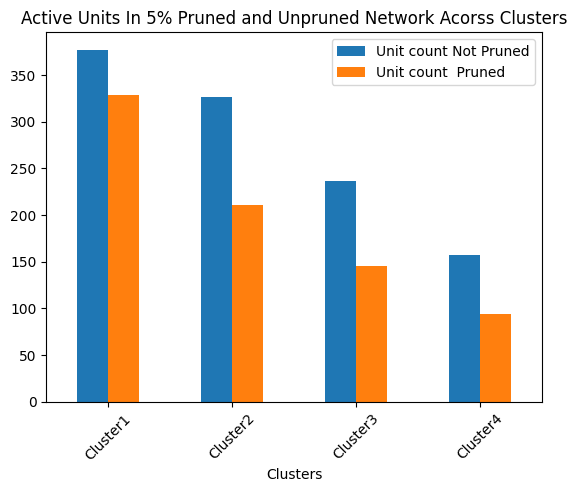

In [203]:
labels=["Cluster1", "Cluster2", "Cluster3", "Cluster4"]

data= {
    "Clusters":labels,
    "Unit count Not Pruned": counts[:4],
    "Unit count  Pruned": counts[4:],

}
df  = pd.DataFrame(data)

ax = df.plot(x="Clusters", y=["Unit count Not Pruned", "Unit count  Pruned"], kind="bar", rot=45)
ax.set_title("Active Units In 5% Pruned and Unpruned Network Acorss Clusters")

**IOU Comps**

In [8]:
def get_avg_iou(ious):
  ious=ious.tolist()
  return sum(ious)/len(ious)
avg_list=[]
all_clusts  =["Cluster1NP", "Cluster2NP", "Cluster3NP", "Cluster4NP","Cluster1P", "Cluster2P", "Cluster3P", "Cluster4P" ]
for df,label in zip(dfs,all_clusts):
  avg_list.append(get_avg_iou(df['best_iou']))
print(len(avg_list[4:]))
data= {
    "Clusters":["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"],
    "Avgs_NotPruned":avg_list[:4],
    "Avgs_Pruned":avg_list[4:],
}
df  = pd.DataFrame(data)
ax = df.plot(x="Clusters", y=["Avgs_NotPruned", "Avgs_Pruned"], kind="bar", rot=45)
ax.set_title("5% Pruning: Avg IOU Across Clusters in Pruned vs Not pruned")

NameError: name 'dfs' is not defined

**Seeung which units are active**

In [143]:
def active_neurons(df):
  units = []
  units.append(df['unit'].unique())
  return units

In [179]:
for label, df in zip(labels, [clus_1_np,clus_2_np, clus_3_np, clus_4_np, clus_1_p, clus_2_p, clus_3_p, clus_4_p]):
  print(label , ": ", active_neurons(df))

Cluster1 :  [array([   6,    8,   12,   15,   16,   17,   19,   22,   28,   31,   37,
         38,   39,   40,   41,   45,   50,   52,   59,   61,   63,   65,
         70,   71,   76,   77,   83,   85,   86,   87,   89,   91,   92,
         98,   99,  106,  109,  113,  128,  129,  132,  133,  134,  136,
        137,  139,  140,  150,  151,  153,  156,  157,  163,  165,  170,
        171,  173,  176,  179,  181,  183,  185,  191,  192,  197,  198,
        203,  204,  209,  213,  215,  224,  225,  230,  231,  232,  234,
        238,  239,  241,  244,  247,  248,  251,  253,  254,  257,  260,
        261,  262,  265,  267,  270,  275,  280,  283,  284,  285,  287,
        288,  290,  292,  293,  294,  296,  297,  298,  302,  304,  307,
        308,  309,  311,  312,  316,  320,  326,  328,  332,  333,  336,
        341,  346,  348,  349,  359,  362,  365,  367,  368,  369,  371,
        375,  376,  377,  378,  380,  382,  385,  386,  387,  389,  390,
        391,  392,  393,  395,  399,  

**Visualizinf Explanations**

In [206]:
import re
def Union(lst1, lst2):
    final_list = sorted(lst1 + lst2)
    return final_list

def concept_similarity(pruned_exps, not_pruned_exps):
  pruned_concps = re.findall(r'\b(?:pre:tok:|hyp:tok:|oth:)\S*', pruned_exps)
  not_pruned_concps = re.findall(r'\b(?:pre:tok:|hyp:tok:|oth:)\S*', not_pruned_exps)
  for i,_ in enumerate(pruned_concps):
    while pruned_concps[i][-1] == ')':
        pruned_concps[i] = pruned_concps[i][:-1]
  for i,_ in enumerate(not_pruned_concps):
    while not_pruned_concps[i][-1] == ')':
        not_pruned_concps[i] = not_pruned_concps[i][:-1]

  intersection = 0
  for pruned_conc in pruned_concps:
    if pruned_conc in not_pruned_concps:
      intersection += 1
  union = len(set(Union(pruned_concps, not_pruned_concps)))
  return intersection/union

def get_common_neurons(pruned, not_pruned):
  return set(pruned['unit'].unique()).intersection(set(not_pruned['unit'].unique()))

def calculate_similarity_across_explanations(pruned, not_pruned):
  common_neurons = get_common_neurons(pruned, not_pruned)
  sim_df=pd.DataFrame({})
  for unit in common_neurons:
    pruned_exp=pruned[pruned['unit']==unit].best_name.iloc[0]

    not_pruned_exp=not_pruned[not_pruned['unit']==unit]['best_name'].iloc[0]


    concept_similarity(pruned_exp, not_pruned_exp)
    sim_df=pd.concat([sim_df, pd.DataFrame({'unit': [unit], 'sim': [concept_similarity(pruned_exp, not_pruned_exp)]})])
  sim_df=sim_df.reset_index().drop(columns=['index'])
  return sim_df

In [207]:
clus_sorted=clus_simdf.sort_values(by=['unit'])
d_s= {}
d_ns={}
for unit in clus_sorted['unit'].unique():
  d_s[unit] = clus_sorted[clus_sorted['unit']==unit]['sim'].tolist()[0]
for unit in clus_simdf['unit'].unique():
  d_ns[unit] = clus_simdf[clus_simdf['unit']==unit]['sim'].tolist()[0]



In [208]:
def plot_sim(clus_simdf, cluster_num):
  labels=clus_simdf['unit'].unique().tolist()
  data= {
      "Units":sorted(labels),
      "IOUS": clus_simdf.sort_values(by=['unit'])['sim'].tolist(),

  }
  df  = pd.DataFrame(data)

  ax = df.plot(x="Units", y="IOUS", kind="bar", rot=90, figsize=(25,25), linewidth=100, fontsize = 16)

  ax.tick_params(axis='x', which='major', labelsize=17)
  filtered_labels=[]
  for un,iou in zip(data['Units'], data['IOUS']):
    if iou != 0:
      filtered_labels.append(un)
    else:
      filtered_labels.append("")
  ax.set_xticklabels(filtered_labels)
  plt.subplots_adjust(bottom=0.2)



  ax.set_title(f"Cluster {cluster_num} – 5% Pruning: Similarity across explanations", fontdict={'fontsize':30})
  plt.tight_layout()
  return plt.gcf()

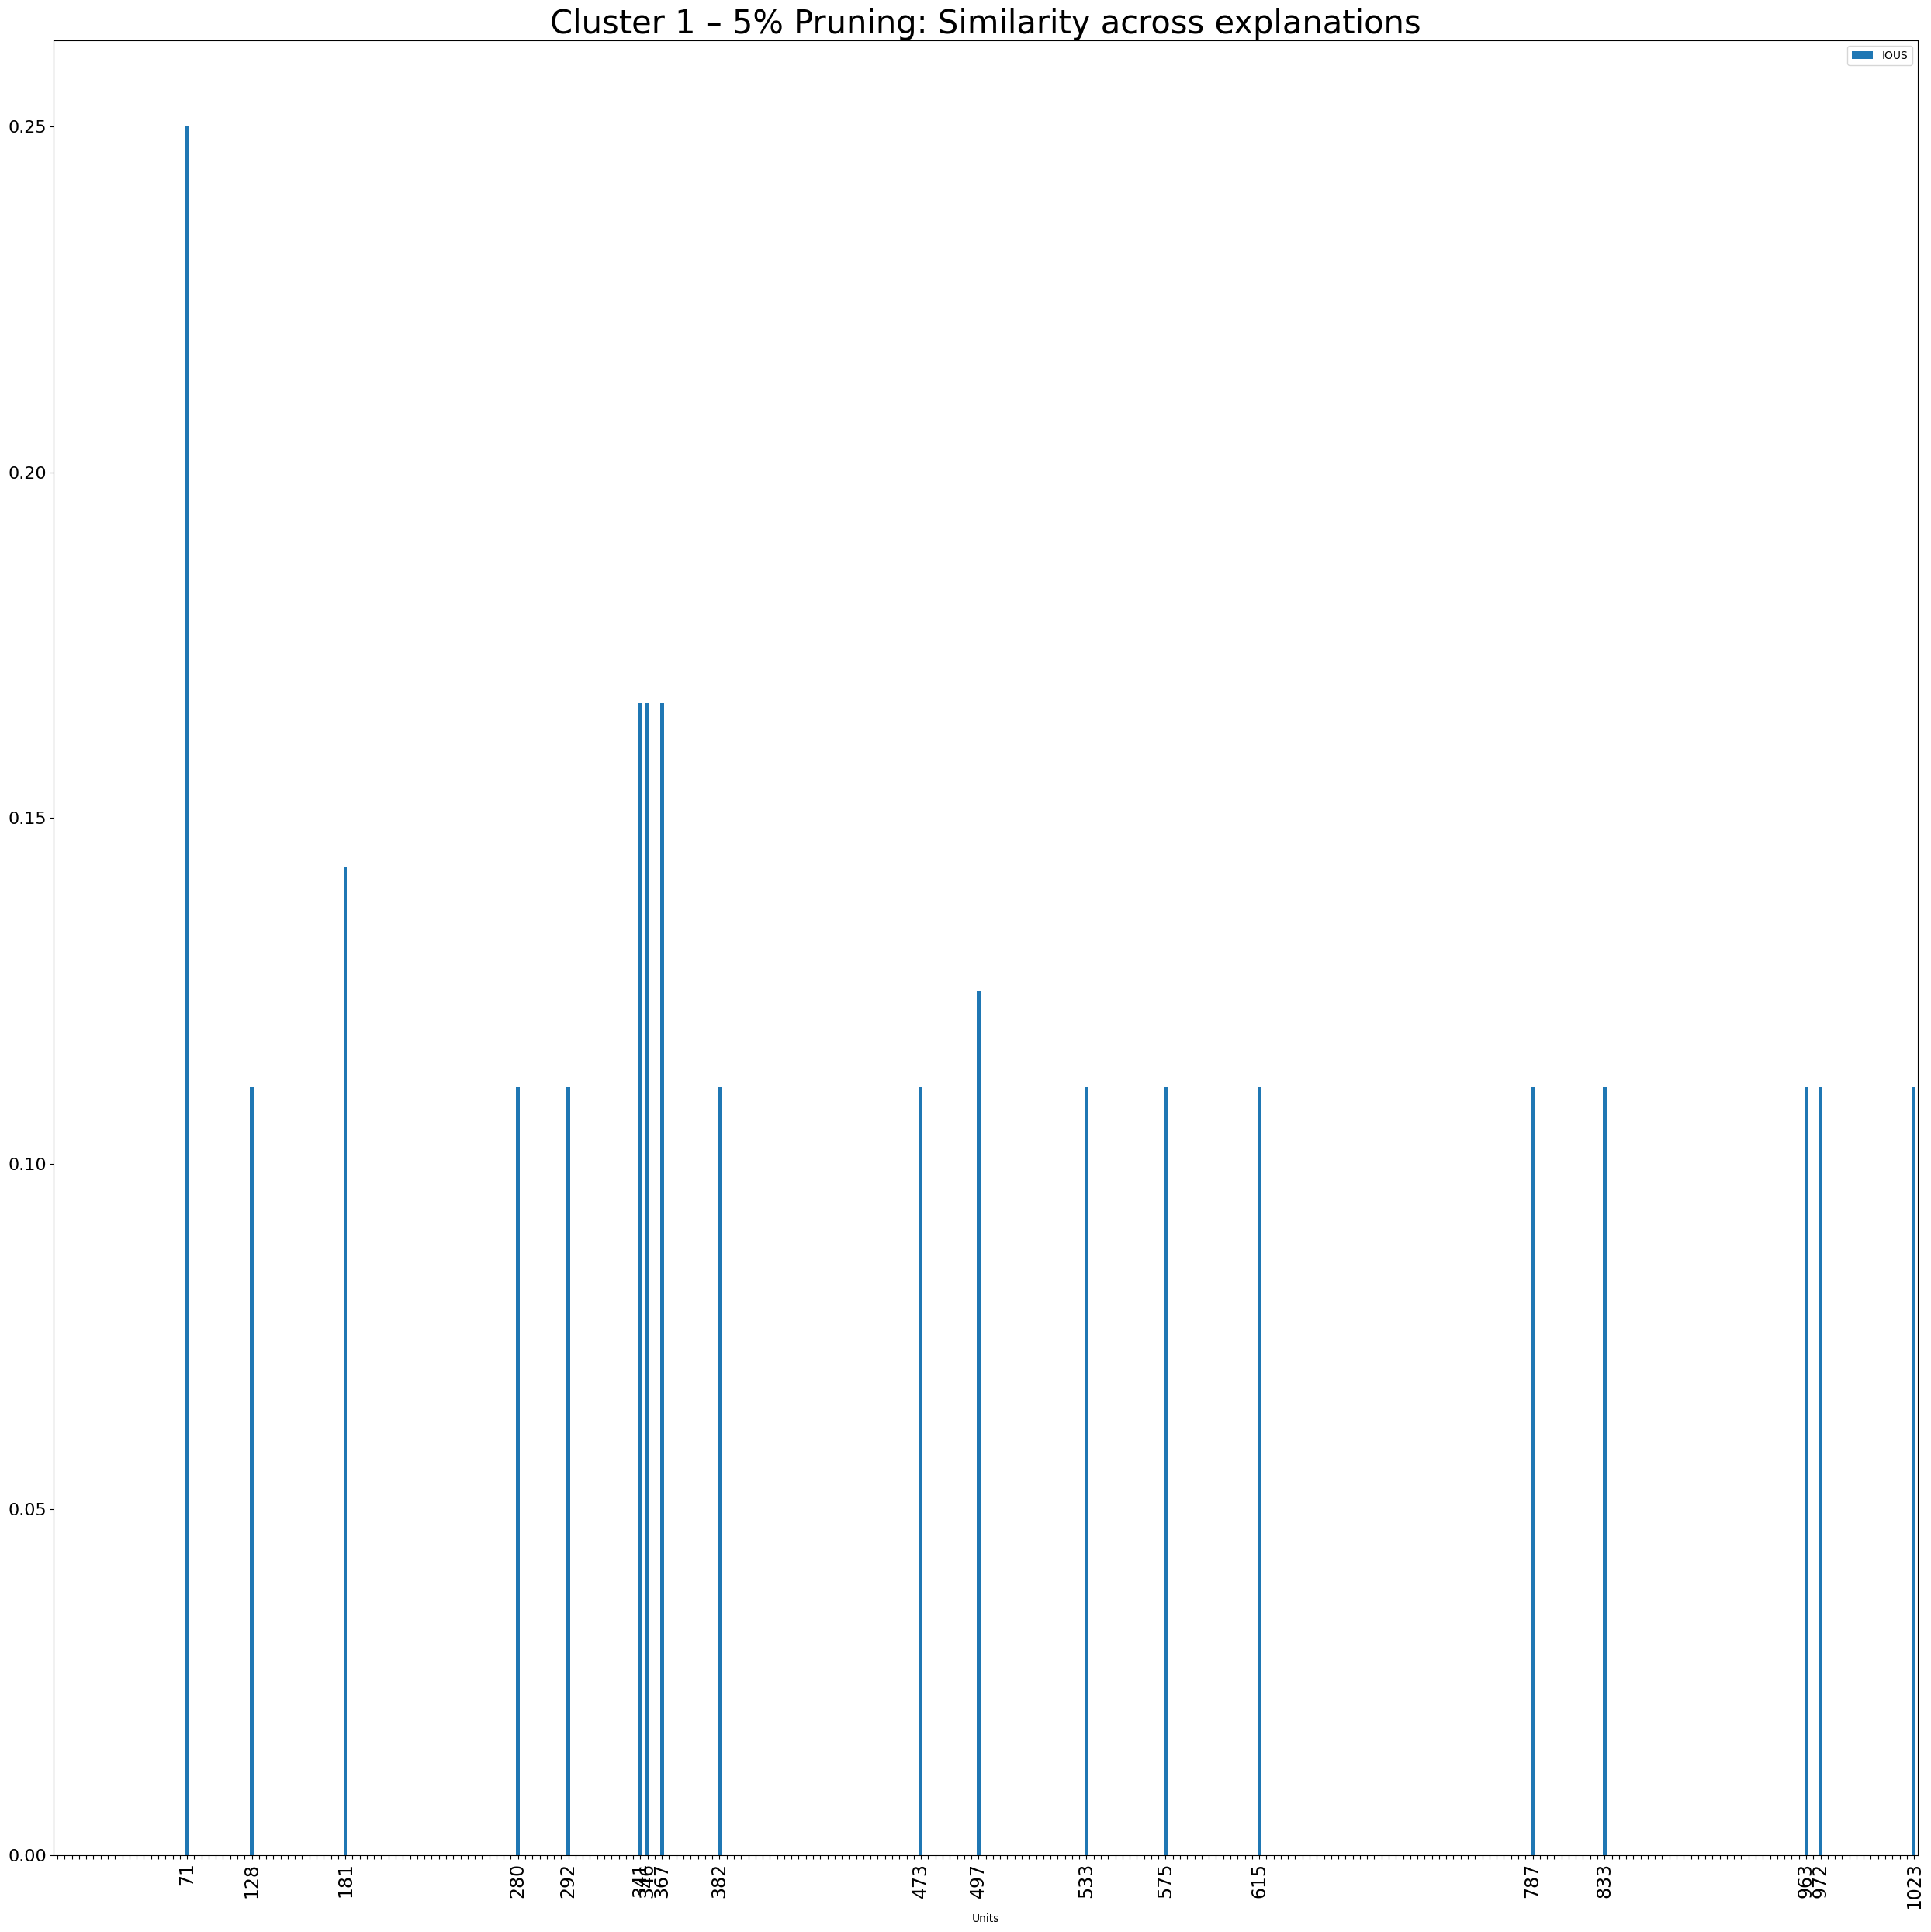

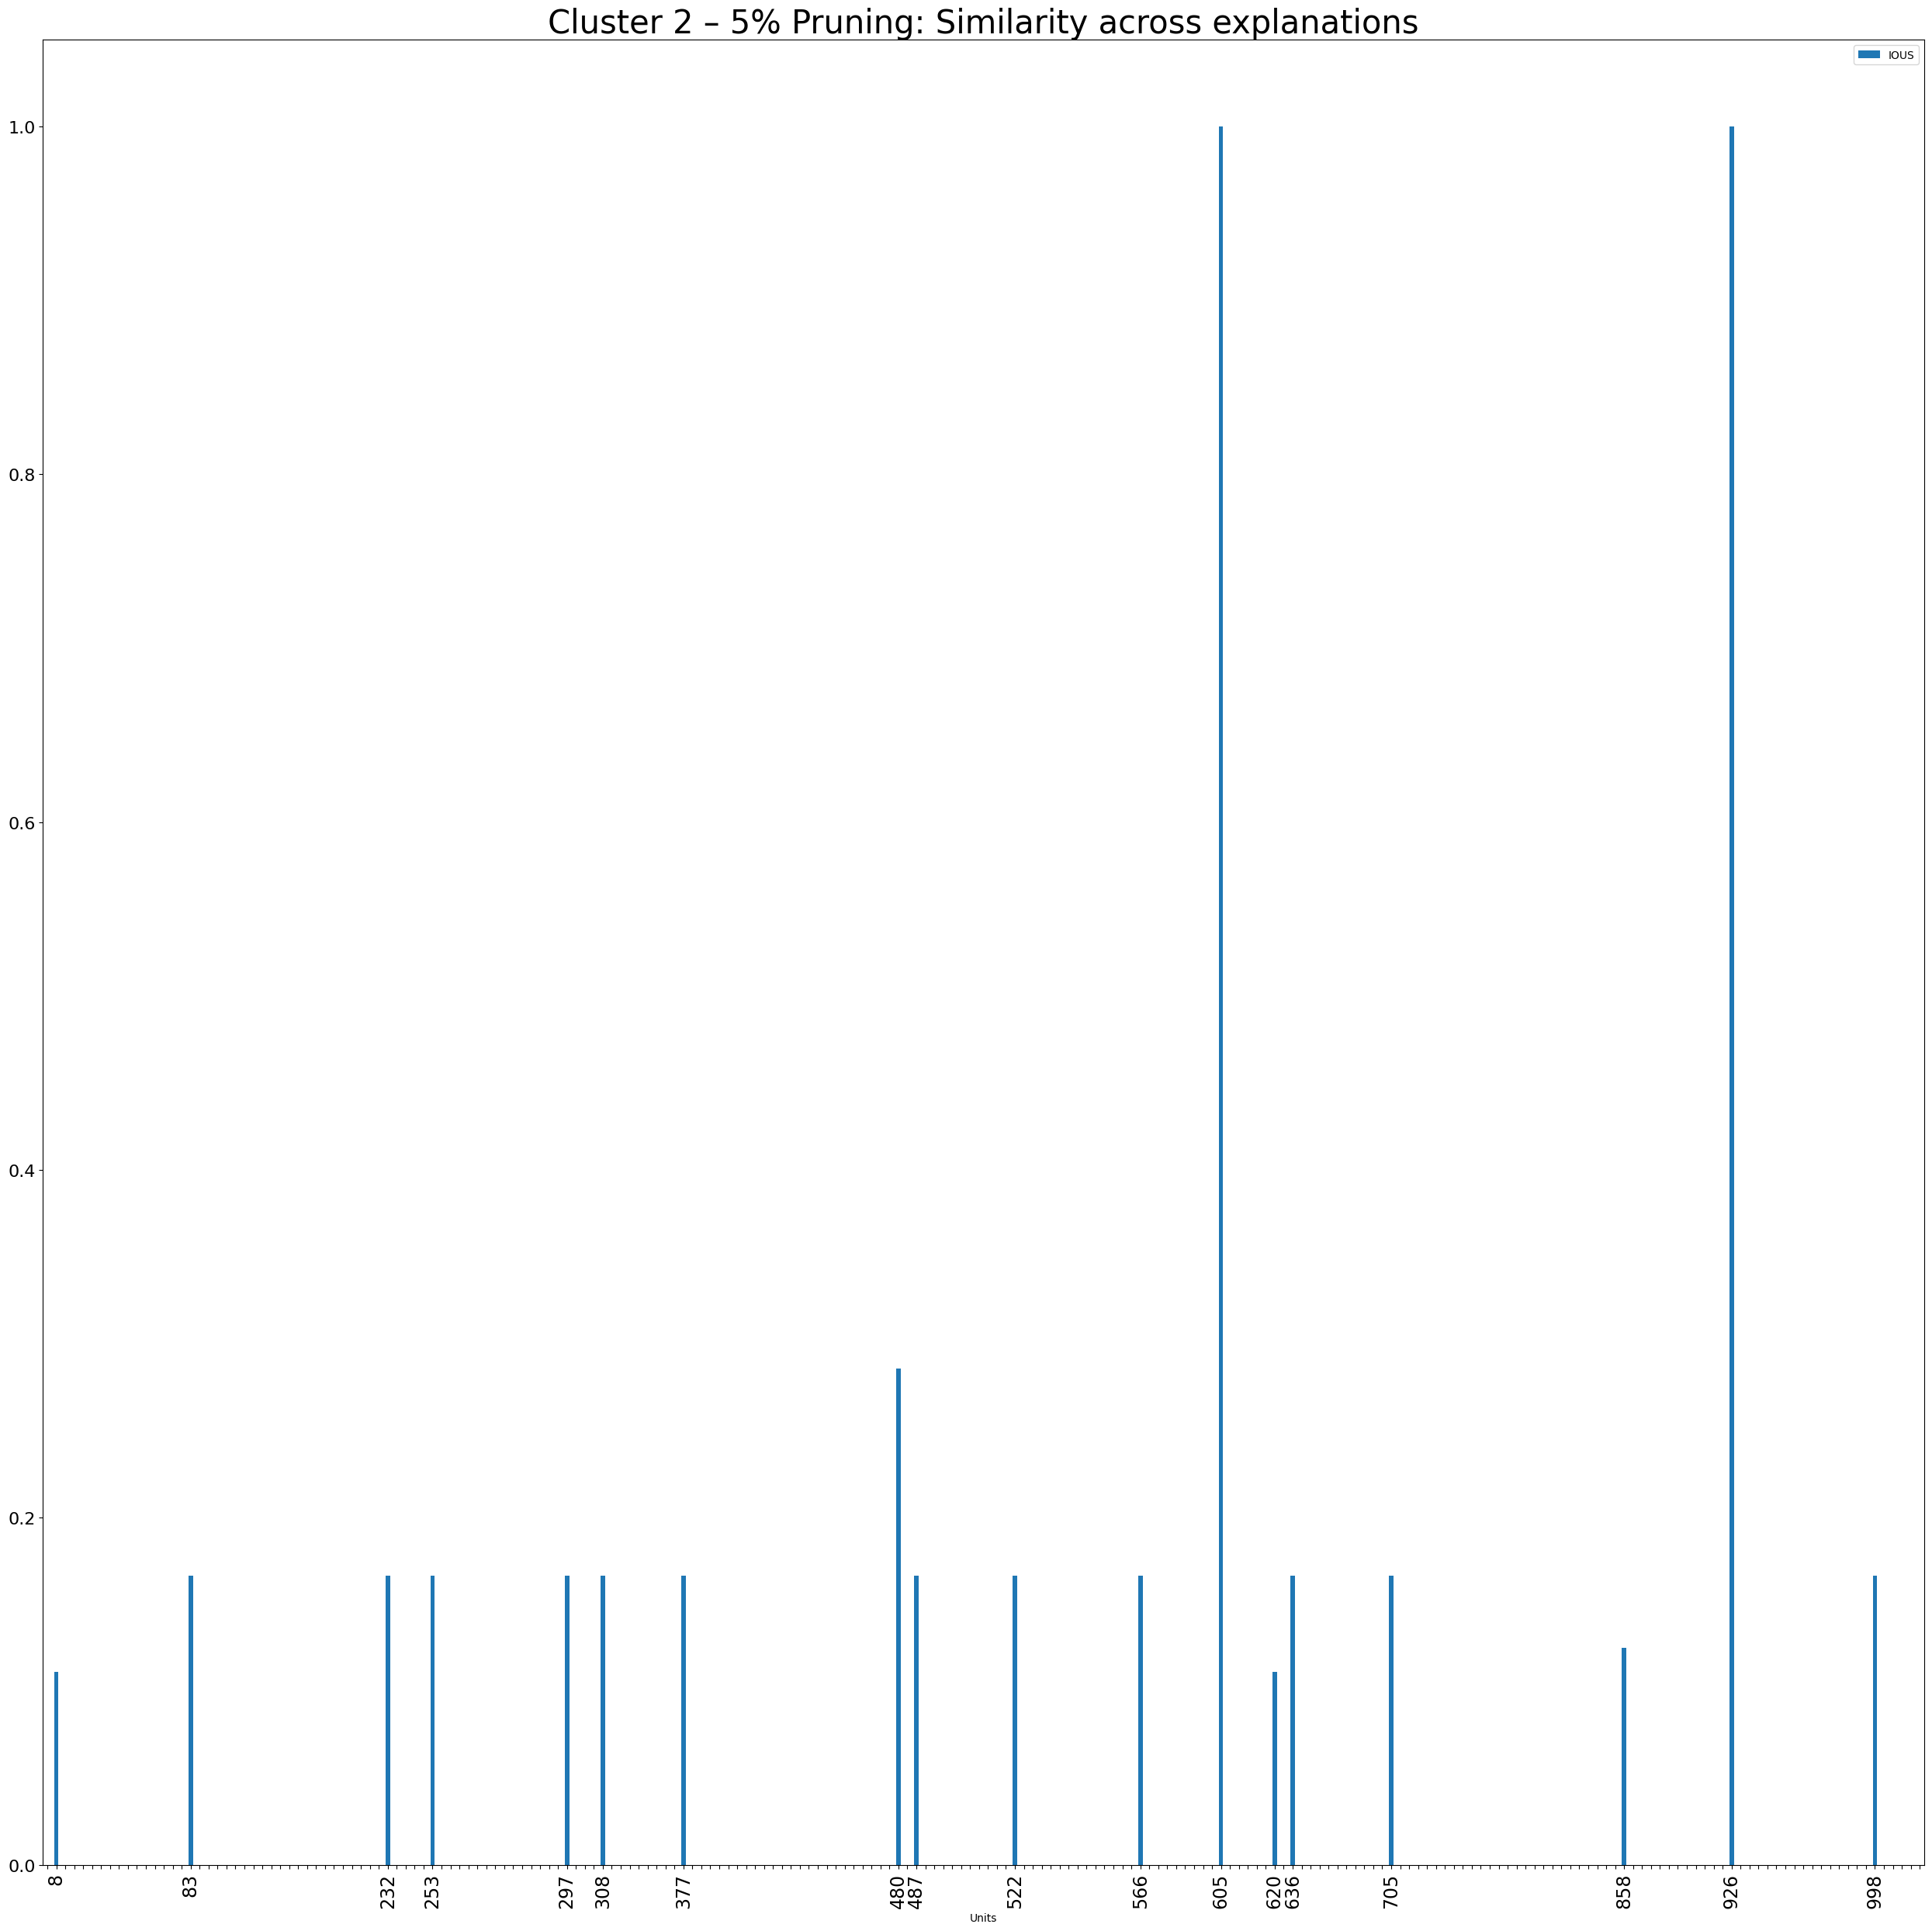

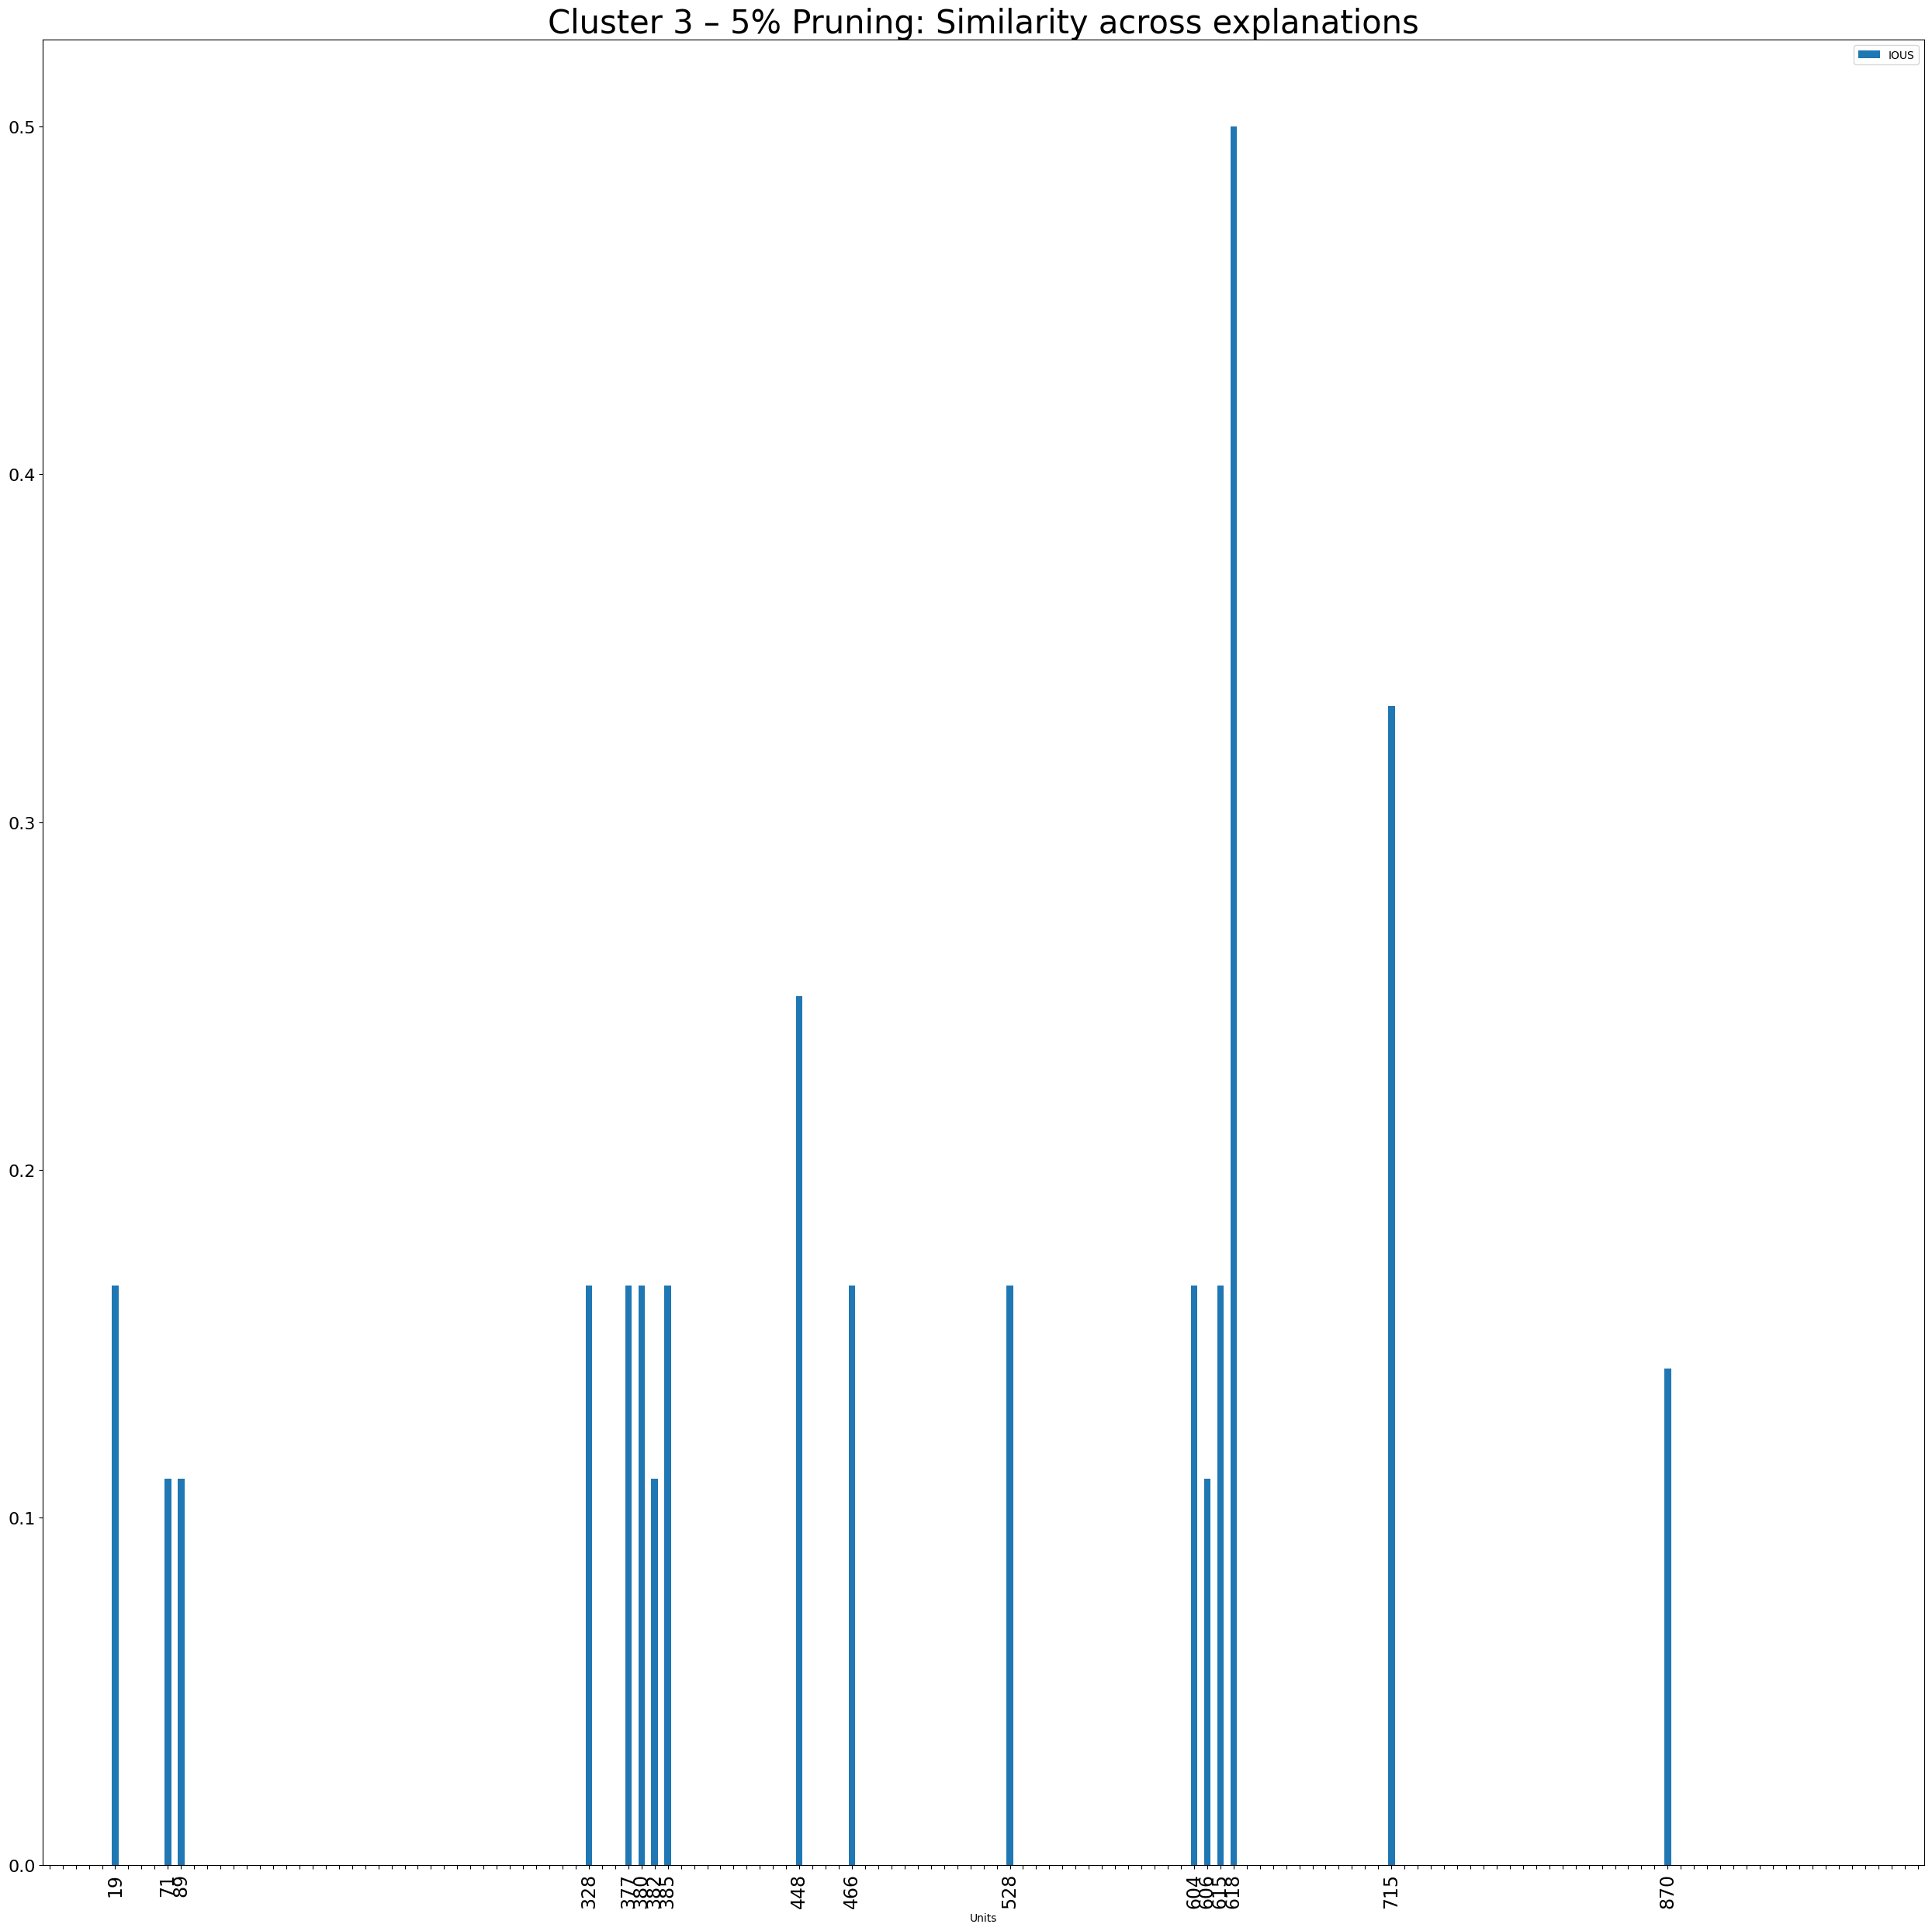

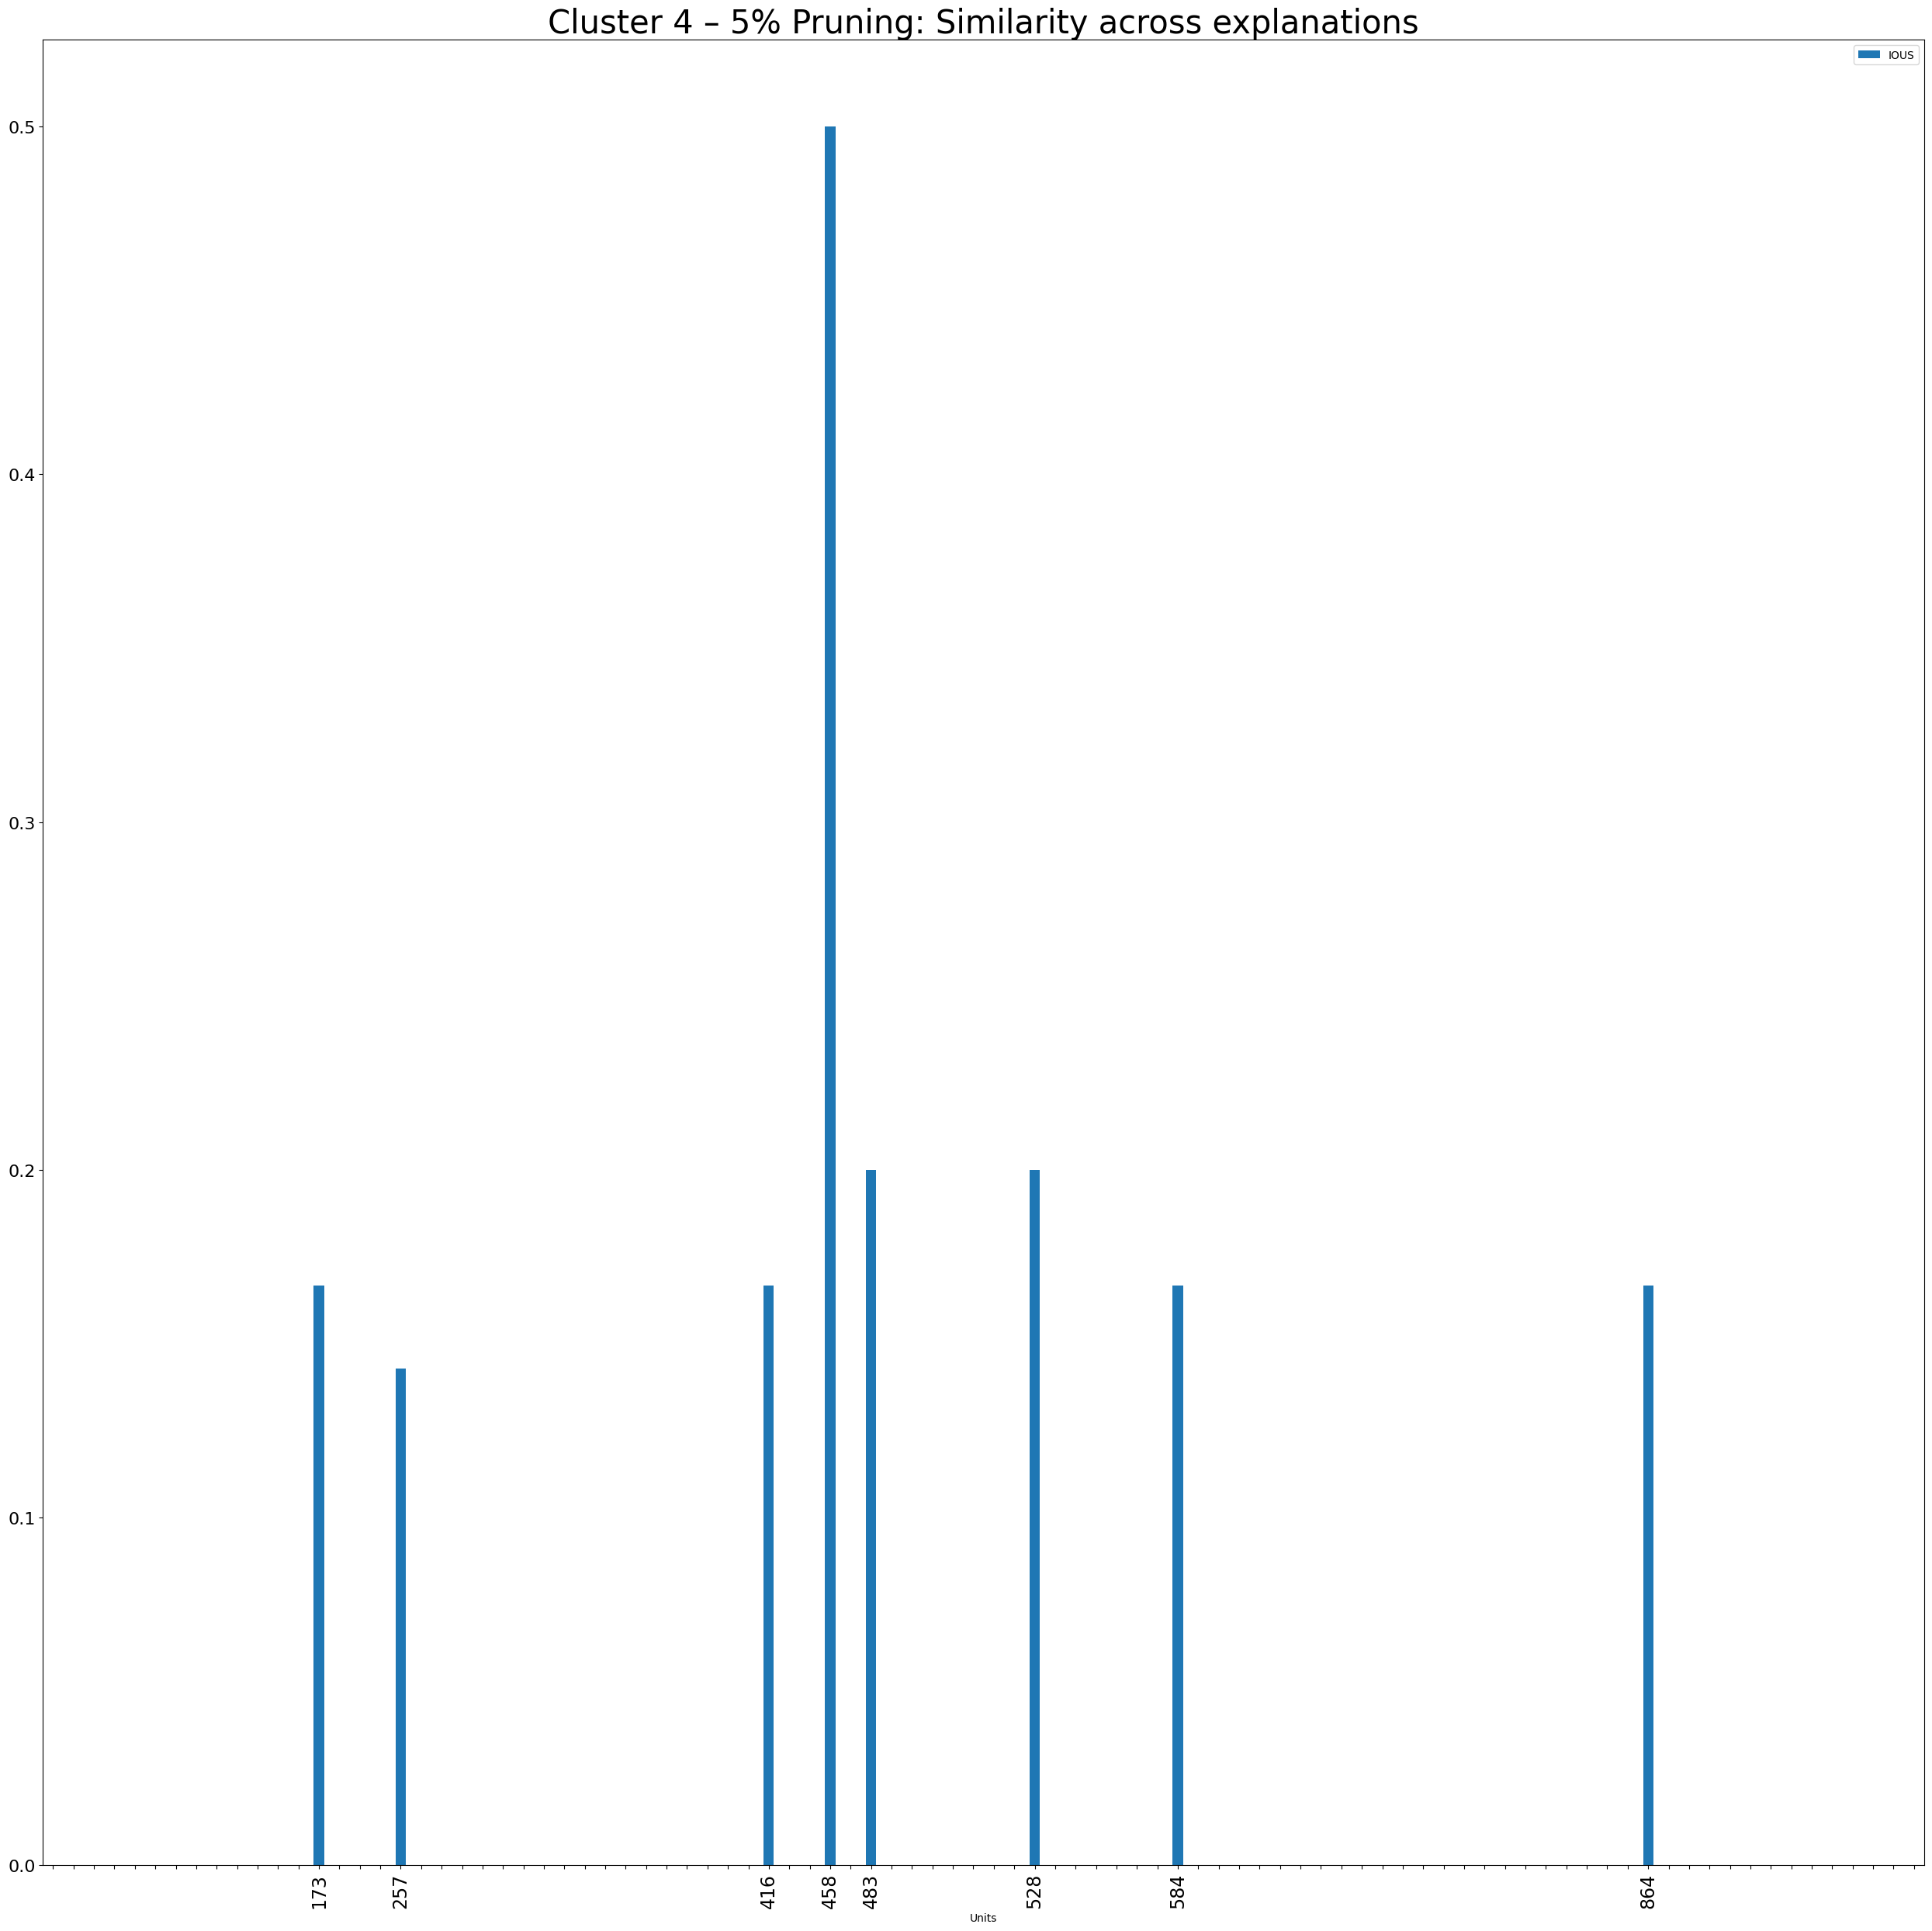

In [209]:
for i in range(1,5):
  if i == 1:
    files = [clus_1_p, clus_1_np]
  elif i ==2:
    files = [clus_2_p, clus_2_np]
  elif i==3:
    files = [clus_3_p, clus_3_np]
  else:
    files = [clus_4_p, clus_4_np]

  clus_simdf = calculate_similarity_across_explanations(files[0], files[1])
  cluster_num = i
  plot_sim(clus_simdf, cluster_num).savefig(f'Cluster{cluster_num}Sim.png')


In [161]:
clus_2_np #across each units in np vs p compute the ious

,unit,best_name,best_iou
5,6,((((NOT oth:overlap:overlap25) AND (hyp:tok:is...,0.123014
7,8,((((hyp:tok:for OR hyp:tok:tall) OR hyp:tok:af...,0.146838
14,15,((((NOT pre:tok:woman) AND (hyp:tok:sitting OR...,0.116327
15,16,((((NOT hyp:tok:wearing) AND (oth:overlap:over...,0.179642
16,17,((((pre:tok:person AND pre:tok:way) OR pre:tok...,0.133333
...,...,...,...
1006,1007,((((hyp:tok:naked OR hyp:tok:swimming) OR hyp:...,0.091205
1007,1008,(hyp:tok:at AND pre:tok:meet),1.000000
1019,1020,((((oth:overlap:overlap25 OR pre:tok:while) OR...,0.211960
1020,1021,((((hyp:tok:at OR hyp:tok:to) OR hyp:tok:for) ...,0.125933


In [160]:
clus_2_p.sort_values(by=['unit'])

,unit,best_name,best_iou
1023,0,((((hyp:tok:asleep OR pre:tok:carpet) OR hyp:t...,0.079439
5,6,((((hyp:tok:officers OR pre:tok:protection) OR...,0.193548
7,8,((((hyp:tok:favorite AND pre:tok:on) OR hyp:to...,0.235294
14,15,(((hyp:tok:her AND pre:tok:bikini) OR hyp:tok:...,0.333333
15,16,((((hyp:tok:indian OR pre:tok:reaches) OR pre:...,0.118110
...,...,...,...
999,1000,((((pre:tok:inflatable OR pre:tok:yoga) OR hyp...,0.125000
1006,1007,((((NOT pre:tok:with) AND (pre:tok:propeller O...,0.266667
1019,1020,((((hyp:tok:indian OR pre:tok:tv) OR hyp:tok:i...,0.097436
1020,1021,((((pre:tok:elephants OR pre:tok:site) OR pre:...,0.100000


In [41]:
clus_4_p['unit'].unique() & clus_4_np['unit'].unique()

ValueError: operands could not be broadcast together with shapes (94,) (6,) 

In [ ]:
clus_1_p

,unit,best_name,best_iou
0,1,(hyp:tok:sitting AND pre:tok:magazine),0.333333
1,2,(((((NOT pre:tok:man) AND hyp:tok:boards) OR h...,0.333333
2,3,(hyp:tok:and AND pre:tok:driven),0.333333
3,4,(hyp:tok:person AND pre:tok:possibly),1.000000
4,5,hyp:tok:eastern,0.333333
...,...,...,...
1019,1020,((((hyp:tok:nun OR pre:tok:enjoy) OR pre:tok:w...,0.144928
1020,1021,((((oth:overlap:overlap25 OR pre:tok:in) OR hy...,0.845883
1021,1022,((((hyp:tok:guns OR hyp:tok:nun) OR hyp:tok:bo...,0.185185
1022,1023,((((oth:overlap:overlap25 OR pre:tok:in) OR hy...,0.848418


In [42]:
max_iou = max(clus_1_np['best_iou'].tolist())
clus_1_np[clus_1_np['best_iou'] == max_iou]

,Unnamed: 0,unit,best_name,best_iou
10,10,635,((hyp:tok:tall AND pre:tok:planting) AND pre:t...,1.0
16,16,935,((hyp:tok:white AND pre:tok:dead) AND pre:tok:...,1.0


In [43]:
min_iou = min(clus_1_np['best_iou'].tolist())
clus_1_np [clus_1_np['best_iou'] == min_iou]

,Unnamed: 0,unit,best_name,best_iou
9,9,615,((((hyp:tok:cat OR pre:tok:riding) OR hyp:tok:...,0.064909


In [44]:
max_iou = max(clus_1_p['best_iou'].tolist())
clus_1_p[clus_1_p['best_iou'] == max_iou]

,unit,best_name,best_iou
3,414,(hyp:tok:lemons AND pre:tok:something),1.0
11,422,(hyp:tok:lemons AND pre:tok:something),1.0
15,426,(hyp:tok:lemons AND pre:tok:something),1.0
16,427,(hyp:tok:lemons AND pre:tok:something),1.0
22,433,((hyp:tok:flag AND pre:tok:waving) AND hyp:tok...,1.0
...,...,...,...
979,979,(hyp:tok:lemons AND pre:tok:something),1.0
986,986,(hyp:tok:cold AND pre:tok:to),1.0
994,994,(hyp:tok:lemons AND pre:tok:something),1.0
996,996,(hyp:tok:lemons AND pre:tok:something),1.0


In [45]:
min_iou = min(clus_1_p['best_iou'].tolist())
clus_1_p [clus_1_p['best_iou'] == min_iou]

,unit,best_name,best_iou
689,738,((((hyp:tok:outside OR hyp:tok:woman) OR pre:t...,0.061339


**Counting Ands/Ors**

To count specificity also consider the length of the exp so num of concepts. if ratio of concepts to ands = 1 very specif, if lower = not spec:


doing regex to get concept count

In [149]:
import re
def count_ANDOR(df):
  d={}
  for i, form in enumerate(df['best_name']):

    ands=form.count("AND")
    ors=form.count("OR")
    nots=form.count("NOT")

    pattern = re.findall(r'\b(?:pre:tok:|hyp:tok:|oth:)\S*', form)
    if ands == 0:
      and_ratio=0
    else:
      and_ratio= (ands)/(ands+ors)
    if ors == 0:
      or_ratio = 0
    else:
      or_ratio = (ors)/(ands+ors)
    d[df['unit'].iloc[i]]={"Ands ": and_ratio, "Ors": or_ratio}

  return d


In [192]:
c1NP

{15: {'Ands ': 0, 'Ors': 1.0},
 215: {'Ands ': 0.5, 'Ors': 0.5},
 275: {'Ands ': 0.25, 'Ors': 0.75},
 375: {'Ands ': 0.75, 'Ors': 0.25},
 395: {'Ands ': 1.0, 'Ors': 0},
 435: {'Ands ': 0.25, 'Ors': 0.75},
 495: {'Ands ': 0, 'Ors': 1.0},
 515: {'Ands ': 0.25, 'Ors': 0.75},
 575: {'Ands ': 0.25, 'Ors': 0.75},
 615: {'Ands ': 0, 'Ors': 1.0},
 635: {'Ands ': 1.0, 'Ors': 0},
 675: {'Ands ': 0.25, 'Ors': 0.75},
 715: {'Ands ': 0.75, 'Ors': 0.25},
 775: {'Ands ': 0.25, 'Ors': 0.75},
 875: {'Ands ': 1.0, 'Ors': 0},
 895: {'Ands ': 0.75, 'Ors': 0.25},
 935: {'Ands ': 1.0, 'Ors': 0},
 1023: {'Ands ': 1.0, 'Ors': 0}}

In [150]:
def sum_andor(diction):
  andsum=0
  orsum=0
  for key,val in diction.items():
    andsum+=diction[key]['Ands ']
    orsum+=diction[key]['Ors']
  return [andsum/(andsum+orsum), orsum/(andsum+orsum)]

In [210]:
c1NP=count_ANDOR(clus_1_np)
c2NP=count_ANDOR(clus_2_np)
c3NP=count_ANDOR(clus_3_np)
c4NP=count_ANDOR(clus_4_np)

c1P=count_ANDOR(clus_1_p)
c2P=count_ANDOR(clus_2_p)
c3P=count_ANDOR(clus_3_p)
c4P=count_ANDOR(clus_4_p)

sumC1NP = sum_andor(c1NP)
sumC2NP = sum_andor(c2NP)
sumC3NP = sum_andor(c3NP)
sumC4NP = sum_andor(c4NP)
sumC1P = sum_andor(c1P)
sumC2P = sum_andor(c2P)
sumC3P = sum_andor(c3P)
sumC4P = sum_andor(c4P)

ands = [sumC1NP[0], sumC2NP[0], sumC3NP[0], sumC4NP[0], sumC1P[0], sumC2P[0], sumC3P[0], sumC4P[0]]
ors =  [sumC1NP[1], sumC2NP[1], sumC3NP[1], sumC4NP[1], sumC1P[1], sumC2P[1], sumC3P[1], sumC4P[1]]
and_to_or_ratio= [ands[i]/ors[i] for i in range(len(ands))]

In [211]:
for label, andval, orval in zip(labels,ands, ors):
  print(label, ":", "And Frequency: ", andval, "Or Frequency: ",  orval, "ratio:",  andval/orval)

Cluster1 : And Frequency:  0.5093085106382979 Or Frequency:  0.49069148936170215 ratio: 1.037940379403794
Cluster2 : And Frequency:  0.5390946502057614 Or Frequency:  0.46090534979423864 ratio: 1.1696428571428574
Cluster3 : And Frequency:  0.5596751412429379 Or Frequency:  0.4403248587570621 ratio: 1.2710505212510026
Cluster4 : And Frequency:  0.5631634819532909 Or Frequency:  0.4368365180467091 ratio: 1.2891859052247876


Text(0.5, 1.0, 'Ands vs Ors in Formulas Across Clusters in 5% Pruned vs Not pruned')

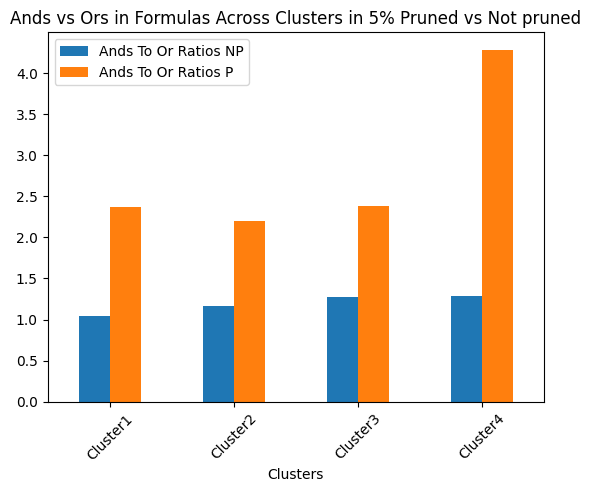

In [213]:
labels=["Cluster1", "Cluster2", "Cluster3", "Cluster4"]
data= {
    "Clusters":labels,
    "Ands To Or Ratios NP":and_to_or_ratio[:4],
    "Ands To Or Ratios P":and_to_or_ratio[4:]
}
df  = pd.DataFrame(data)
ax = df.plot(x="Clusters", y=["Ands To Or Ratios NP", "Ands To Or Ratios P"], kind="bar", rot=45)
ax.set_title("Ands vs Ors in Formulas Across Clusters in 5% Pruned vs Not pruned")

**Old stuff**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
neuron_count_df = neuron_count_df.transpose().rename(columns={0:'neuron_count'}).reset_index()

In [ ]:
import matplotlib.pyplot as plt
plt.bar(neuron_count_df['index'], neuron_count_df['neuron_count'])
plt.ylabel("Count")

NameError: name 'neuron_count_df' is not defined

In [ ]:
d1=count_ANDOR(r0c1)
d1
sum_andor(d1)

(0.49503493931592496, 0.504965060684075)

In [ ]:
d2=count_ANDOR(r0c2)
sum_andor(d2)

(0.5790533736153072, 0.4209466263846928)

In [ ]:
d3=count_ANDOR(r0c3)
sum_andor(d3)

(0.7194244604316546, 0.2805755395683453)

In [ ]:
d4=count_ANDOR(r0c4)
sum_andor(d4)

(0.8831168831168831, 0.11688311688311688)

In [ ]:
def combine_runs(df1, df2, df3, df4):
  df = pd.DataFrame({})
  for i, neuron in enumerate(df2['unit'].tolist()):
    c1_i=df1.index[df1['unit'] == neuron]

    if len(c1_i) == 0:
      content_c1 = 'NA'
    else:
      content_c1=df1.iloc[c1_i]['formula'].tolist()[0]

    c2_i=df2.index[df2['unit'] == neuron]

    if len(c2_i) == 0:
      content_c2 = 'NA'
    else:
      content_c2=df2.iloc[c2_i]['formula'].tolist()[0]

    c3_i=df3.index[df3['unit'] == neuron]

    if len(c3_i) == 0:
      content_c3 =  'NA'
    else:
      content_c3=df3.iloc[c3_i]['formula'].tolist()[0]

    c4_i=df4.index[df4['unit'] == neuron]

    if len(c4_i) == 0:
      content_c4 =  'NA'
    else:
      content_c4=df4.iloc[c4_i]['formula'].tolist()[0]

    df = pd.concat([df, pd.DataFrame({'unit': [neuron], 'cluster1': [content_c1], 'cluster2': [content_c2], 'cluster3': [content_c3],'cluster4': [content_c4]})])
  return df
combine_runs(best_exp_r0c1, best_exp_r0c2, best_exp_r0c3, best_exp_r0c4)

,unit,cluster1,cluster2,cluster3,cluster4
0,15,((((hyp:tok:eating OR pre:tok:racetrack) OR pr...,((((hyp:tok:sitting OR hyp:tok:sleeping) OR hy...,((((NOT pre:tok:on) AND (hyp:tok:sits OR hyp:t...,((((hyp:tok:sitting AND pre:tok:walking) OR hy...
0,35,NA,((hyp:tok:couch AND pre:tok:little) AND pre:to...,NA,NA
0,215,((hyp:tok:gymnasium OR hyp:tok:hooded) AND pre...,((hyp:tok:musical AND pre:tok:to) AND pre:tok:is),((hyp:tok:moving AND pre:tok:ball) AND pre:tok...,NA
0,275,((((hyp:tok:gloves OR pre:tok:act) AND hyp:tok...,((hyp:tok:shade AND pre:tok:in) AND pre:tok:in),NA,NA
0,375,(((((NOT hyp:tok:while) AND oth:overlap:overla...,((((NOT hyp:tok:are) AND (hyp:tok:nobody OR ot...,((((hyp:tok:nobody OR hyp:tok:not) OR hyp:tok:...,((((hyp:tok:no AND pre:tok:playing) OR hyp:tok...
0,395,((hyp:tok:to AND pre:tok:forehead) AND pre:tok...,((((hyp:tok:old AND pre:tok:to) AND pre:tok:on...,((hyp:tok:old AND pre:tok:white) AND pre:tok:s...,NA
0,435,((((hyp:tok:car AND pre:tok:lady) OR hyp:tok:s...,((((hyp:tok:guitar AND pre:tok:blue) OR hyp:to...,((hyp:tok:street AND pre:tok:backs) AND pre:to...,NA
0,495,((((hyp:tok:sad OR pre:tok:snow) OR pre:tok:go...,((((NOT oth:overlap:overlap25) AND (pre:tok:cu...,((hyp:tok:field AND pre:tok:houses) AND pre:to...,NA
0,515,((((hyp:tok:phone OR pre:tok:kites) OR pre:tok...,((((hyp:tok:park OR pre:tok:suspenders) AND pr...,((((hyp:tok:marathon OR hyp:tok:stroll) AND hy...,NA
0,575,((((hyp:tok:purple OR pre:tok:picture) OR hyp:...,((((NOT pre:tok:red) AND (hyp:tok:blue OR hyp:...,(((((NOT oth:overlap:overlap50) AND hyp:tok:br...,(((hyp:tok:trunks OR pre:tok:meet) AND hyp:tok...


In [ ]:
best_exp_r0c1

,unit,formula,iou
0,15,((((hyp:tok:eating OR pre:tok:racetrack) OR pr...,0.084211
1,215,((hyp:tok:gymnasium OR hyp:tok:hooded) AND pre...,0.500000
2,275,((((hyp:tok:gloves OR pre:tok:act) AND hyp:tok...,0.235294
3,375,(((((NOT hyp:tok:while) AND oth:overlap:overla...,0.092105
4,395,((hyp:tok:to AND pre:tok:forehead) AND pre:tok...,0.250000
5,435,((((hyp:tok:car AND pre:tok:lady) OR hyp:tok:s...,0.152174
6,495,((((hyp:tok:sad OR pre:tok:snow) OR pre:tok:go...,0.073944
7,515,((((hyp:tok:phone OR pre:tok:kites) OR pre:tok...,0.078740
8,575,((((hyp:tok:purple OR pre:tok:picture) OR hyp:...,0.072000
9,615,((((hyp:tok:cat OR pre:tok:riding) OR hyp:tok:...,0.064909


In [ ]:
best_exp_r0c2

,unit,formula,iou
0,15,((((hyp:tok:sitting OR hyp:tok:sleeping) OR hy...,0.112878
1,35,((hyp:tok:couch AND pre:tok:little) AND pre:to...,1.000000
2,215,((hyp:tok:musical AND pre:tok:to) AND pre:tok:is),0.500000
3,275,((hyp:tok:shade AND pre:tok:in) AND pre:tok:in),0.333333
4,375,((((NOT hyp:tok:are) AND (hyp:tok:nobody OR ot...,0.106484
5,395,((((hyp:tok:old AND pre:tok:to) AND pre:tok:on...,0.500000
6,435,((((hyp:tok:guitar AND pre:tok:blue) OR hyp:to...,0.227273
7,495,((((NOT oth:overlap:overlap25) AND (pre:tok:cu...,0.116279
8,515,((((hyp:tok:park OR pre:tok:suspenders) AND pr...,0.111111
9,575,((((NOT pre:tok:red) AND (hyp:tok:blue OR hyp:...,0.112745


In [ ]:
best_exp_r0c3

,unit,formula,iou
0,15,((((NOT pre:tok:on) AND (hyp:tok:sits OR hyp:t...,0.176692
1,215,((hyp:tok:moving AND pre:tok:ball) AND pre:tok...,1.000000
2,375,((((hyp:tok:nobody OR hyp:tok:not) OR hyp:tok:...,0.186441
3,395,((hyp:tok:old AND pre:tok:white) AND pre:tok:s...,1.000000
4,435,((hyp:tok:street AND pre:tok:backs) AND pre:to...,0.500000
5,495,((hyp:tok:field AND pre:tok:houses) AND pre:to...,1.000000
6,515,((((hyp:tok:marathon OR hyp:tok:stroll) AND hy...,0.300000
7,575,(((((NOT oth:overlap:overlap50) AND hyp:tok:br...,0.166667
8,615,((((hyp:tok:car AND pre:tok:bike) OR hyp:tok:p...,0.122449
9,715,((NOT pre:tok:while) AND (hyp:tok:tall AND pre...,0.666667


In [ ]:
best_exp_r0c4

,unit,formula,iou
0,15,((((hyp:tok:sitting AND pre:tok:walking) OR hy...,0.192308
1,375,((((hyp:tok:no AND pre:tok:playing) OR hyp:tok...,0.312500
2,575,(((hyp:tok:trunks OR pre:tok:meet) AND hyp:tok...,0.400000
3,615,((((hyp:tok:mountain AND pre:tok:below) OR pre...,0.250000
4,775,((hyp:tok:speaking AND pre:tok:table) AND pre:...,1.000000
5,1023,((((hyp:tok:for OR hyp:tok:to) OR hyp:tok:his)...,0.184401


In [ ]:
best_exp_r0c2=store_best_exp(r0c2)
d2=count_ANDOR(best_exp_r0c2)
d2
sum_andor(d2)

(0.5081967213114754, 0.4918032786885246)

In [ ]:
best_exp_r0c3=store_best_exp(r0c3)
d3=count_ANDOR(best_exp_r0c3)
d3
sum_andor(d3)

(0.6052631578947368, 0.39473684210526316)

In [ ]:
best_exp_r0c4=store_best_exp(r0c4)
d4=count_ANDOR(best_exp_r0c4)
d4
sum_andor(d4)

(0.5238095238095238, 0.47619047619047616)

In [ ]:
def comp_exp(df):
  max_iou={}
  start=0
  for neuron in df['unit'].unique():
    neurons_iou=df[df['unit']==neuron]['iou']
    neurons_iou=list(neurons_iou)
    if neuron not in max_iou.keys():
      maxIOU= max(neurons_iou)
      indexes = [i  for i in range(len(neurons_iou)) if neurons_iou[i] ==maxIOU ]
      max_iou[neuron] = [maxIOU]
      for ind in indexes:
        max_iou[neuron].append([df['form'][start+ind]])
    start += len(neurons_iou)
  return max_iou



In [ ]:
r2c1_=comp_exp(r2c1)
'''r2c2_=comp_exp(r2c2)
r2c3_=comp_exp(r2c3)
r2c4_= comp_exp(r2c4)'''

'r2c2_=comp_exp(r2c2)\nr2c3_=comp_exp(r2c3)\nr2c4_= comp_exp(r2c4)'

In [ ]:
def get_max_val_len(diction):
  m=0
  for vals in diction.values():
    if (len(vals) > m):
      m=len(vals)
  return m
def fill_empty(diction):
  max_len=get_max_val_len(diction)
  for k,v in diction.items():
    len_d=len(diction[k])
    if len_d < max_len:
      for i in range(max_len-len_d):
        diction[k].append(0)
  return diction



In [ ]:
r2c1_=fill_empty(r2c1_)
r2c1_pd=pd.DataFrame.from_dict(r2c1_)

In [ ]:
r2c1_pd

NameError: name 'r2c1_pd' is not defined

In [ ]:
r2c2=fill_empty(r2c2_)
r2c2_pd=pd.DataFrame.from_dict(r2c2)

In [ ]:
r2c3=fill_empty(r2c3_)
r2c3_pd=pd.DataFrame.from_dict(r2c3)

In [ ]:
r2c4=fill_empty(r2c4_)
r2c4_pd=pd.DataFrame.from_dict(r2c4)
r2c4_pd

,15,375,575,615,1023
0,0.17284,0.272727,0.5,0.285714,0.191872
1,[hyp:tok:sitting oth:overlap:overlap25 pre:tok...,[hyp:tok:no pre:tok:with hyp:tok:written hyp:t...,[pre:tok:meet hyp:tok:hats hyp:tok:wearing hyp...,[hyp:tok:skateboarding pre:tok:on hyp:tok:man ...,[hyp:tok:for hyp:tok:to hyp:tok:his oth:overla...
2,[hyp:tok:sitting oth:overlap:overlap25 pre:tok...,[hyp:tok:no pre:tok:with hyp:tok:anything hyp:...,[hyp:tok:hats pre:tok:meet hyp:tok:wearing hyp...,[hyp:tok:skateboarding pre:tok:on hyp:tok:man ...,[hyp:tok:to hyp:tok:for hyp:tok:his oth:overla...
3,[hyp:tok:sitting pre:tok:on oth:overlap:overla...,0,0,[hyp:tok:skateboarding pre:tok:on hyp:tok:man ...,[hyp:tok:for hyp:tok:his hyp:tok:to oth:overla...
4,[hyp:tok:sitting pre:tok:on oth:overlap:overla...,0,0,[hyp:tok:skateboarding pre:tok:on hyp:tok:man ...,[hyp:tok:his hyp:tok:for hyp:tok:to oth:overla...
...,...,...,...,...,...
516,0,0,0,[hyp:tok:skateboarding pre:tok:on hyp:tok:man ...,0
517,0,0,0,[hyp:tok:skateboarding pre:tok:on hyp:tok:man ...,0
518,0,0,0,[hyp:tok:skateboarding pre:tok:on hyp:tok:man ...,0
519,0,0,0,[hyp:tok:skateboarding pre:tok:on hyp:tok:man ...,0


In [ ]:
d1=count_ANDOR(r2c1_pd)
d2=count_ANDOR(r2c2_pd)
d3=count_ANDOR(r2c3_pd)
d4=count_ANDOR(r2c4_pd)

NameError: name 'r2c2_pd' is not defined

In [ ]:
d1_pd=pd.DataFrame.from_dict(d1)
d2_pd=pd.DataFrame.from_dict(d2)
d3_pd=pd.DataFrame.from_dict(d3)
d4_pd=pd.DataFrame.from_dict(d4)

NameError: name 'd2' is not defined

In [ ]:
dict_c1=dict(d1_pd.mean(axis=1))

NameError: name 'd2_pd' is not defined

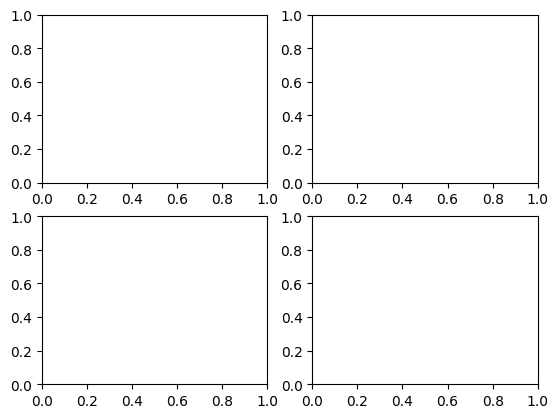

In [ ]:
fig, axs = plt.subplots(2, 2)
dict_c1=dict(d1_pd.mean(axis=1))
dict_c2=dict(d2_pd.mean(axis=1))
dict_c3=dict(d3_pd.mean(axis=1))
dict_c4=dict(d4_pd.mean(axis=1))
axs[0, 0].bar(*zip(*dict_c1.items()))
axs[0, 0].set_title('Cluster 1')
axs[0,0].set_ylim(0, 3)
axs[0, 1].bar(*zip(*dict_c2.items()))
axs[0, 1].set_title('Cluster 2')
axs[0,1].set_ylim(0, 3)
axs[1, 0].bar(*zip(*dict_c3.items()))
axs[1, 0].set_title('Cluster 3')
axs[1,0].set_ylim(0, 3)
axs[1, 1].bar(*zip(*dict_c4.items()))
axs[1, 1].set_title('Cluster 4')
axs[1,1].set_ylim(0, 3)
fig.savefig('AndsOrs.png')

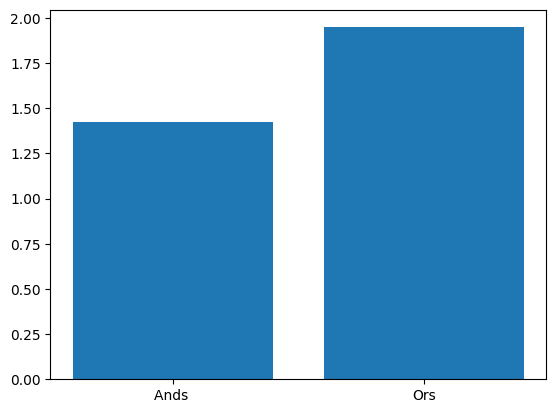

In [ ]:
import matplotlib.pyplot as plt

dict_c1=dict(d1_pd.mean(axis=1))
plt.bar(*zip(*dict_c1.items()))
plt.show()

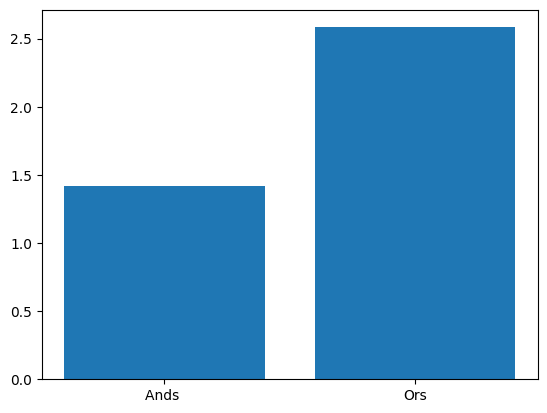

In [ ]:
import matplotlib.pyplot as plt

dict_c2=dict(d2_pd.mean(axis=1))
plt.bar(*zip(*dict_c2.items()))
plt.show()

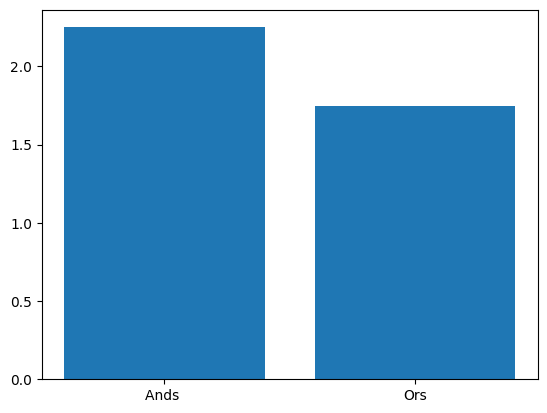

In [ ]:
import matplotlib.pyplot as plt

dict_c3=dict(d3_pd.mean(axis=1))
plt.bar(*zip(*dict_c3.items()))
plt.show()

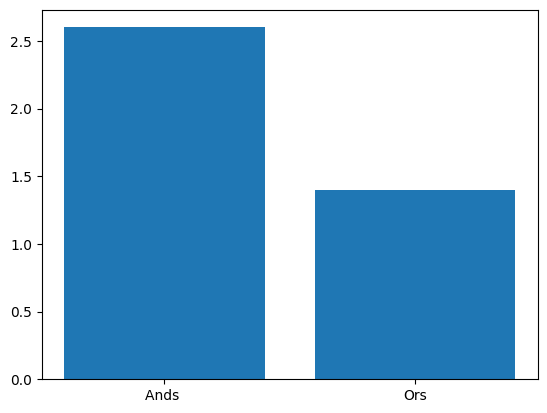

In [ ]:
import matplotlib.pyplot as plt

dict_c4=dict(d4_pd.mean(axis=1))
plt.bar(*zip(*dict_c4.items()))
plt.show()

In [ ]:
d3_pd.mean(axis=1)

Ands     2.25
Ors      1.75
Nots     1.25
Total    5.25
dtype: float64

In [ ]:
d4_pd

,15,375,575,615,1023
Ands,4,2,2,4,1
Ors,0,2,2,0,3


In [ ]:
int_run1run2_df = pd.merge(run_1_clus_1, run_2_clus_1)
union_run1run2_df = pd.concat([run_1_clus_1, run_2_clus_1])
int_run1run2_df=int_run1run2_df.drop_duplicates()
union_run1run2_df=union_run1run2_df.drop_duplicates()
len(int_run1run2_df)/len(union_run1run2_df)

0.8172471996317324

In [ ]:
int_run0run1_df = pd.merge(run_0_clus_1, run_1_clus_1)
union_run0run1_df = pd.concat([run_0_clus_1, run_1_clus_1])
int_run0run1_df=int_run0run1_df.drop_duplicates()
union_run0run1_df=union_run0run1_df.drop_duplicates()
len(int_run0run1_df)/len(union_run0run1_df)

0.7024795582457258

In [ ]:
concepts = list(run_2_clus_1['concept'])
for row in int_run1run2_df['concept']:
  if row not in concepts:
    print(type(row))